In [5]:
from owslib.wms import WebMapService
url = 'https://www.mrlc.gov/geoserver/mrlc_display/NLCD_2016_Land_Cover_L48/wms?service=WMS'
wms = WebMapService(url, version='1.1.1')
print(wms.identification.type)
print(wms.identification.title)
print(wms.identification.abstract)
#wms.identification.version
print(list(wms.contents))
print([op.name for op in wms.operations])

OGC:WMS
GeoServer Web Map Service
A compliant implementation of WMS plus most of the SLD extension (dynamic styling). Can also generate PDF, SVG, KML, GeoRSS
['NLCD_2016_Land_Cover_L48']
['GetCapabilities', 'GetMap', 'GetFeatureInfo', 'DescribeLayer', 'GetLegendGraphic', 'GetStyles']


In [2]:
wms['NLCD_2016_Land_Cover_L48'].styles

{'mrlc:mrlc_NLCD_2016_Land_Cover_L48': {'title': 'A boring default style',
  'legend': 'https://www.mrlc.gov/geoserver/mrlc_display/NLCD_2016_Land_Cover_L48/wms?request=GetLegendGraphic&format=image%2Fpng&width=20&height=20&layer=NLCD_2016_Land_Cover_L48'}}

In [17]:
wms['NLCD_2016_Land_Cover_L48']

AttributeError: 'ContentMetadata' object has no attribute 'formatOptions'

In [7]:
wms.getOperationByName('GetFeatureInfo').methods

[{'type': 'Get',
  'url': 'https://www.mrlc.gov/geoserver/mrlc_display/NLCD_2016_Land_Cover_L48/wms?SERVICE=WMS&'},
 {'type': 'Post',
  'url': 'https://www.mrlc.gov/geoserver/mrlc_display/NLCD_2016_Land_Cover_L48/wms?SERVICE=WMS&'}]

In [16]:
wms.getOperationByName('GetFeatureInfo').formatOptions

['text/plain',
 'application/vnd.ogc.gml',
 'text/xml',
 'application/vnd.ogc.gml/3.1.1',
 'text/xml; subtype=gml/3.1.1',
 'text/html',
 'application/json']

## ignore

In [8]:
tesdt = wms.Get(layers=['NLCD_2016_Land_Cover_L48'],
                 #styles=['A boring default style'],
                 srs='EPSG:4326',
                 bbox=(-112, 36, -106, 41),
                 size=(300, 250),
                 format='image/jpeg',
                 transparent=True
                )

AttributeError: 'WebMapService_1_1_1' object has no attribute 'Get'

In [25]:
wms.getOperationByName('GetMap').methods

[{'type': 'Get',
  'url': 'https://www.mrlc.gov/geoserver/mrlc_display/NLCD_2016_Land_Cover_L48/wms?SERVICE=WMS&'}]

In [26]:
wms.getOperationByName('GetMap').formatOptions

['image/png',
 'application/atom xml',
 'application/atom+xml',
 'application/json;type=utfgrid',
 'application/openlayers',
 'application/openlayers2',
 'application/openlayers3',
 'application/pdf',
 'application/rss xml',
 'application/rss+xml',
 'application/vnd.google-earth.kml',
 'application/vnd.google-earth.kml xml',
 'application/vnd.google-earth.kml+xml',
 'application/vnd.google-earth.kml+xml;mode=networklink',
 'application/vnd.google-earth.kmz',
 'application/vnd.google-earth.kmz xml',
 'application/vnd.google-earth.kmz+xml',
 'application/vnd.google-earth.kmz;mode=networklink',
 'atom',
 'image/geotiff',
 'image/geotiff8',
 'image/gif',
 'image/gif;subtype=animated',
 'image/jpeg',
 'image/png8',
 'image/png; mode=8bit',
 'image/svg',
 'image/svg xml',
 'image/svg+xml',
 'image/tiff',
 'image/tiff8',
 'image/vnd.jpeg-png',
 'image/vnd.jpeg-png8',
 'kml',
 'kmz',
 'openlayers',
 'rss',
 'text/html; subtype=openlayers',
 'text/html; subtype=openlayers2',
 'text/html; subtyp

In [21]:
import geopandas as gpd
test = wms.getmap(   layers=['NLCD_2016_Land_Cover_L48'],
                 #styles=['A boring default style'],
                 srs='EPSG:4326',
                 bbox=(-112, 36, -106, 41),
                 size=(300, 250),
                 format='application/json;type=utfgrid',
                 transparent=True
                )
gpd.GeoDataFrame(io.BytesIO(test.read()))

,0
0,b'{\n'
1,"b'""grid"": [\n'"
2,"b'"" ..."
3,"b'"" ..."
4,"b'"" ..."
...,...
66,"b' """"\n'"
67,"b'],\n'"
68,"b'""data"": {\n'"
69,b'}\n'


geotiff

In [76]:
test = wms.getmap(   layers=['NLCD_2016_Land_Cover_L48'],
                 #styles=['A boring default style'],
                 srs='EPSG:4326',
                 bbox=(-112, 36, -106, 41),
                 size=(300, 250),
                 format='image/geotiff',
                 transparent=True
                )
with open('test.tif','wb') as f:
    f.write(test.read())

try kml

In [77]:
test = wms.getmap(   layers=['NLCD_2016_Land_Cover_L48'],
                 #styles=['A boring default style'],
                 srs='EPSG:4326',
                 bbox=(-112, 36, -106, 41),
                 size=(300, 250),
                 format='application/vnd.google-earth.kml',
                 transparent=True
                )
with open('test.kml','wb') as f:
    f.write(test.read())

In [42]:
import geopandas as gpd

# Enable fiona driver
#see https://gist.github.com/mazzma12/0a32ce693bb42b742252caabb98519db
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'


In [45]:
gdf = gpd.read_file('test.kml', driver = 'KML' )

In [46]:
gdf

,Name,Description,geometry


## open as image

In [12]:
import io

In [82]:
response = wms.getmap(
    layers=['NLCD_2016_Land_Cover_L48'],
    #styles=['A boring default style'],
    srs='EPSG:4326',
    #bbox=(-112, 36, -106, 41),
    #bbox = (-112,36,-111,37),
    bbox = (-124.5,32,-114,42.1), #california
    #bbox = (-118.5,33.5,-118,34), #LA
    size=(4000, 4000),
    #format='image/png'
    format ='image/png; mode=8bit',
    transparent = True
)
image = io.BytesIO(response.read())
data = plt.imread(image)
data = (data[:,:,:]*255).astype(np.int)

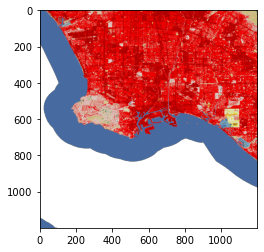

In [67]:
plt.imshow(data)

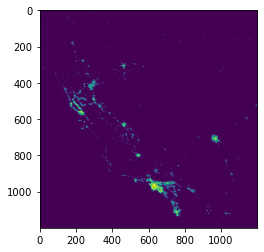

In [75]:
def is_red(cv):
    return cv[1] == 0 and cv[2] == 0 and cv[3] > 0
plt.imshow(np.vectorize(is_red,signature='(k)->()')(data))

In [83]:
#fnp.save('data/cal_urban.npy',np.vectorize(is_red,signature='(k)->()')(data))

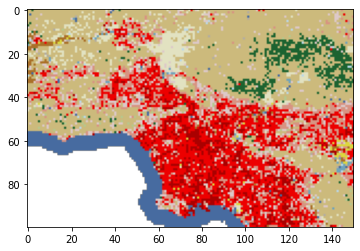

In [57]:
plt.imshow(data[900:1000,550:700],interpolation='none')

In [10]:
with open('test.png','wb') as f:
    f.write(img.read())

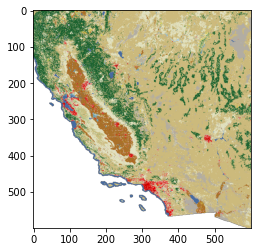

In [11]:
from matplotlib import pyplot as plt
arr = plt.imread('test.png'); plt.imshow(arr)

In [68]:
import rasterio
import rasterio.features
import rasterio.warp
import geopandas as gpd

with rasterio.open('test.tif') as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()
    
    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            dataset.crs, 'EPSG:4326', geom, precision=6)
    print(dataset.indexes)
    test = dataset.read(1)

(1,)


In [70]:
geom

{'type': 'Polygon',
 'coordinates': [[[-112.0, 41.0],
   [-112.0, 36.0],
   [-106.0, 36.0],
   [-106.0, 41.0],
   [-112.0, 41.0]]]}

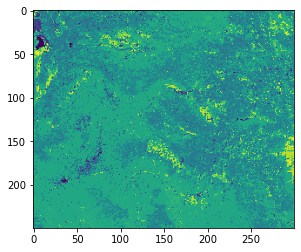

In [98]:
plt.imshow(test)

In [89]:
with rasterio.open('test.tif') as dataset:
    mask = dataset.dataset_mask()
    test = [x for x in rasterio.features.shapes(
                mask, transform=dataset.transform)]